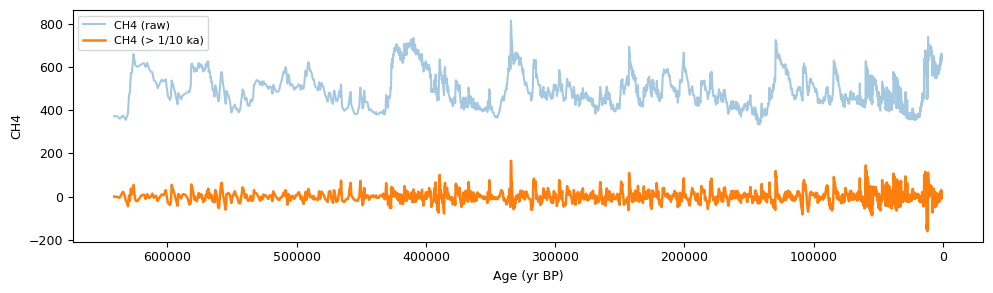

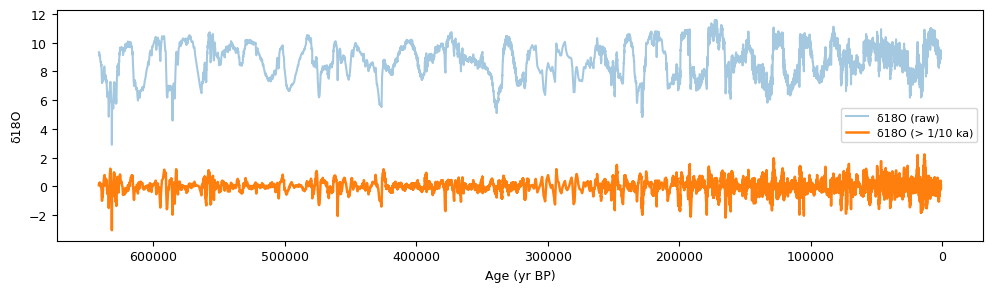

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


# 0) Load raw data
df_ch4 = pd.read_excel('other_data/CH4_AICC2023.xlsx', sheet_name='Sheet1')
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"
df_d18O = pd.read_excel(file_path)
df_d18O['age'] *= 1000  # to yrs BP
df_d18O['d18O'] = df_d18O['d18O'].values*-1
# renmae column d18O to 'd18O*-1'
df_d18O.rename(columns={'d18O': '-d18O'}, inplace=True)

dt=10
# 1) Build common 10-yr age grid over their overlap
age_min = 1000 # max(df_ch4['age'].min(), df_d18O['age'].min())
age_max = min(df_ch4['age'].max(), df_d18O['age'].max())
ages = np.arange(age_min, age_max + 1, dt)

# 2) Interpolate each onto that grid
ch4 = np.interp(ages, df_ch4['age'], df_ch4['ch4'])
d18O = np.interp(ages, df_d18O['age'], df_d18O['-d18O'])



df_ch4_interp = pd.DataFrame({'age':ages, 'ch4':ch4})
df_d18O_interp = pd.DataFrame({'age':ages, 'd18O':d18O})

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = True             # quick comparison plot
)




# df_filt_ch4, df_filt_d18O = sa.bandpass_ch4_d18o(
#     df_ch4_interp,
#     df_d18O_interp,
#     low_period = 300,     # keep variability slower than 300 yr
#     high_period = 10_000,  # and faster than 3 ka
#     flip_sign = False,
#     plot = True
# )

df_filt_d18O['filt_d18O'] = df_filt_d18O['filt_d18O'].rolling(window=5, min_periods=1).mean()
# drop NaN values
df_filt_d18O = df_filt_d18O.dropna()


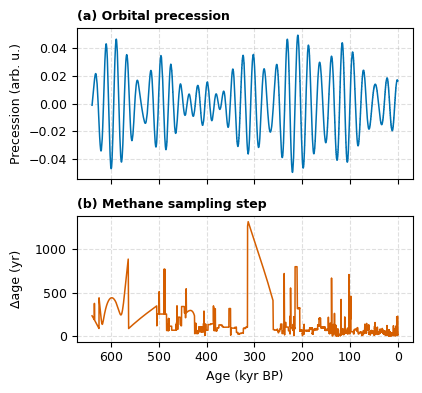

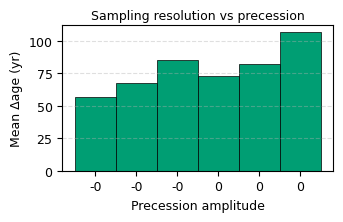

In [27]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

fig_pair, fig_bar = sa.age_gap_ana(
    df_d18O,
    age_min=0,
    age_max=640_000,
    pre_path=r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt",
    n_bins=6,
    tolerance=200
)



In [2]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


fig = sa.age_gap_interactive(
    df_d18O,
    age_min=0,
    age_max=640_000,
    H_line=100,
)
fig.show()

Maximum Δage within 0-640000 yr BP: 1316 years
95% quantile of Δage: 257 years


# TE dT plot

Running TE scan for window 1000 to 401000 years
Running TE scan for window 11000 to 411000 years
Running TE scan for window 21000 to 421000 years
Running TE scan for window 31000 to 431000 years
Running TE scan for window 41000 to 441000 years
Running TE scan for window 51000 to 451000 years
Running TE scan for window 61000 to 461000 years
Running TE scan for window 71000 to 471000 years
Running TE scan for window 81000 to 481000 years
Running TE scan for window 91000 to 491000 years
Running TE scan for window 101000 to 501000 years
Running TE scan for window 111000 to 511000 years
Running TE scan for window 121000 to 521000 years
Running TE scan for window 131000 to 531000 years
Running TE scan for window 141000 to 541000 years
Running TE scan for window 151000 to 551000 years
Running TE scan for window 161000 to 561000 years
Running TE scan for window 171000 to 571000 years
Running TE scan for window 181000 to 581000 years
Running TE scan for window 191000 to 591000 years
Running TE 

d:\VScode\bipolar_seesaw_CCM\toolbox\sq_ana.py:3229: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize, dpi=dpi)


Processing window: 211000 to 611000 years
Processing window: 221000 to 621000 years
Processing window: 231000 to 631000 years
Processing window: 241000 to 641000 years
      dt     te_xy  p_xy     te_yx  p_yx  sig_uni  window_start  window_end
0     10  0.000258  0.37  0.000391  0.05    False        1000.0    401000.0
1     20  0.000611  0.42  0.000783  0.07    False        1000.0    401000.0
2     30  0.000922  0.46  0.001226  0.06    False        1000.0    401000.0
3     40  0.001551  0.47  0.001563  0.05    False        1000.0    401000.0
4     50  0.002181  0.35  0.001972  0.02    False        1000.0    401000.0
..   ...       ...   ...       ...   ...      ...           ...         ...
270   70  0.002417  0.67  0.002113  0.09    False      241000.0    641000.0
271   80  0.002301  0.77  0.002431  0.14    False      241000.0    641000.0
272   90  0.003370  0.57  0.002746  0.16    False      241000.0    641000.0
273  100  0.003969  0.64  0.003042  0.11    False      241000.0    64100

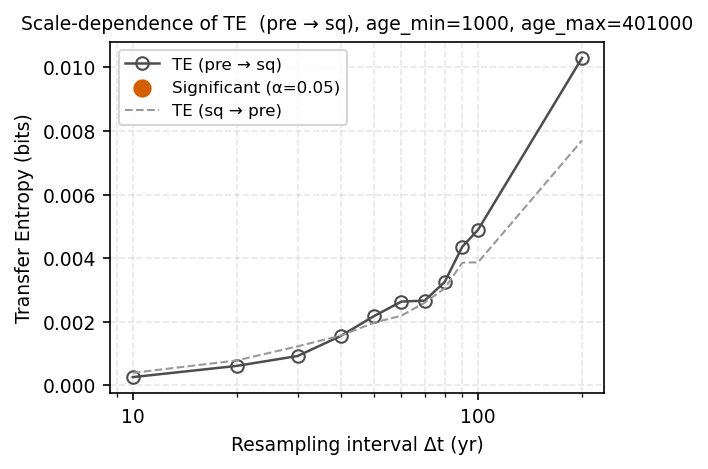

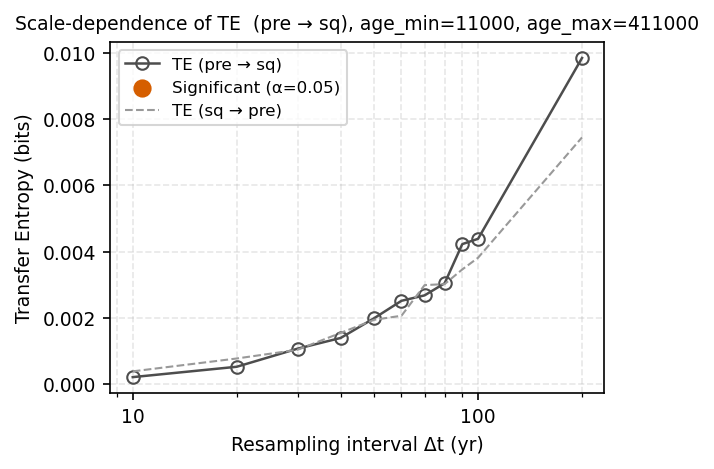

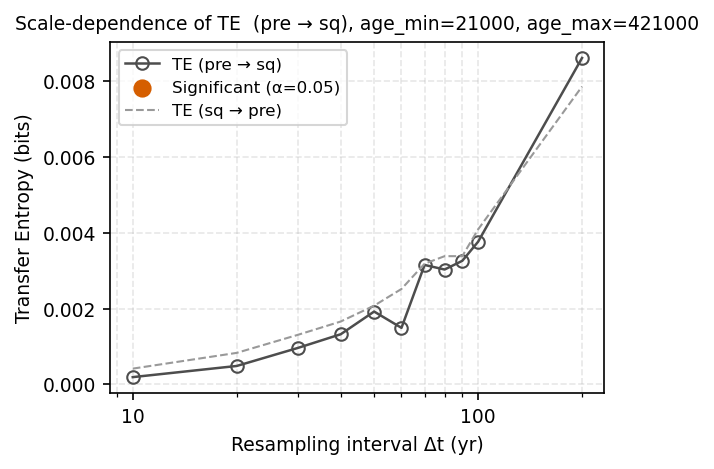

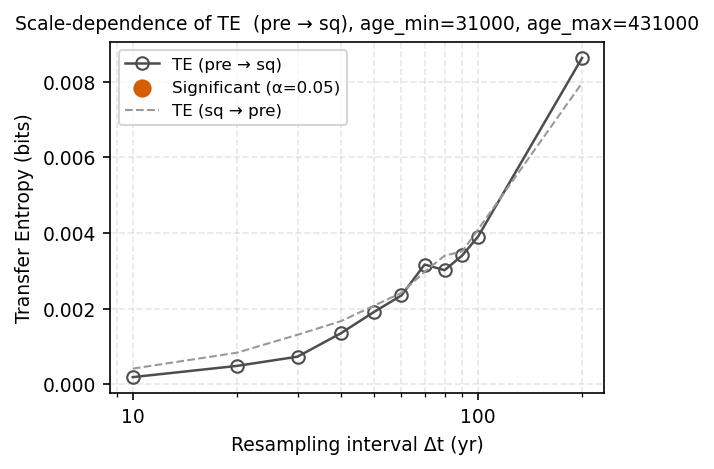

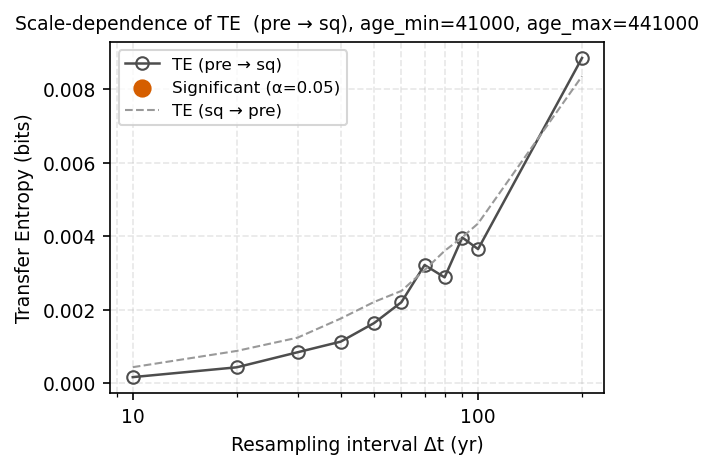

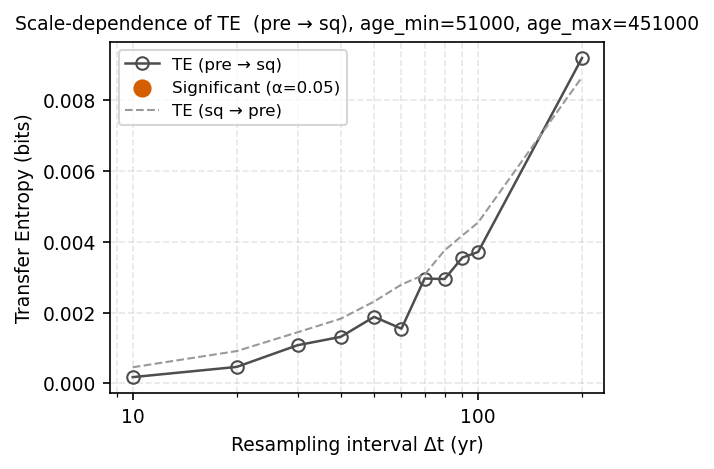

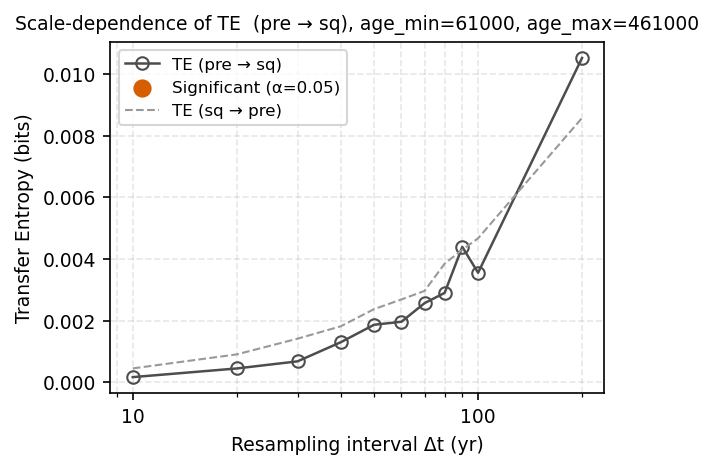

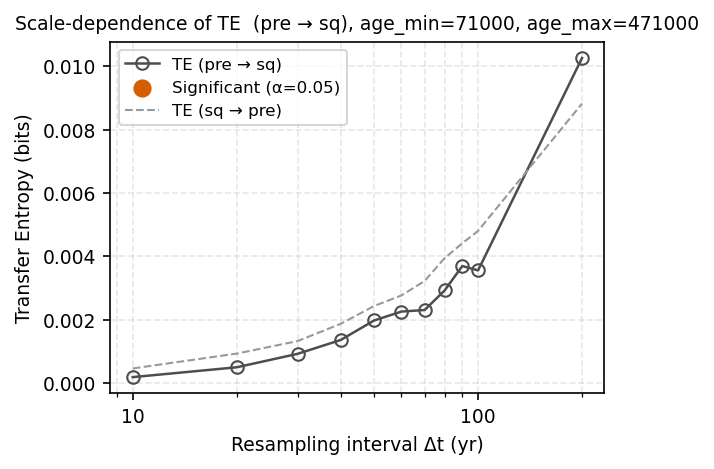

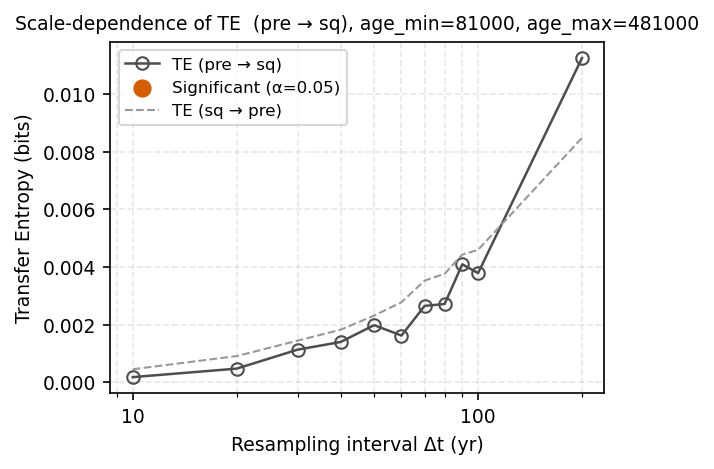

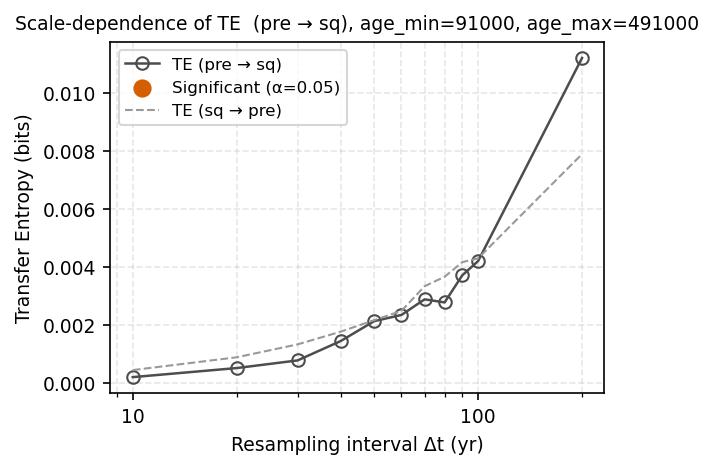

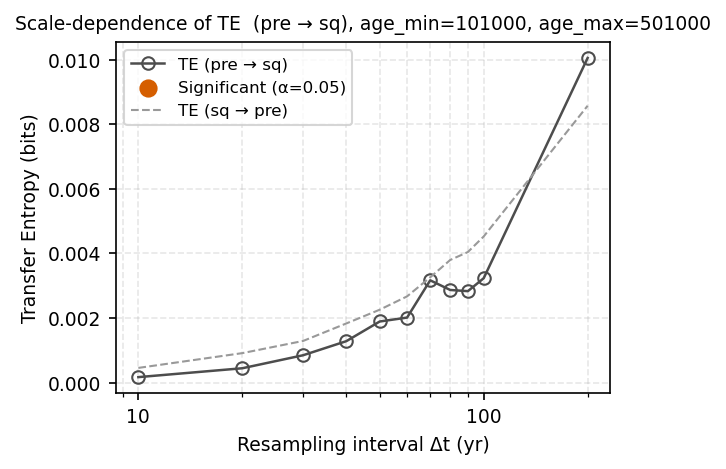

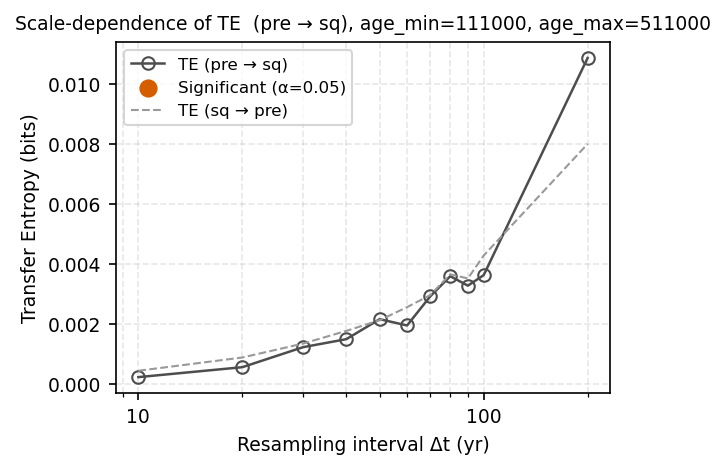

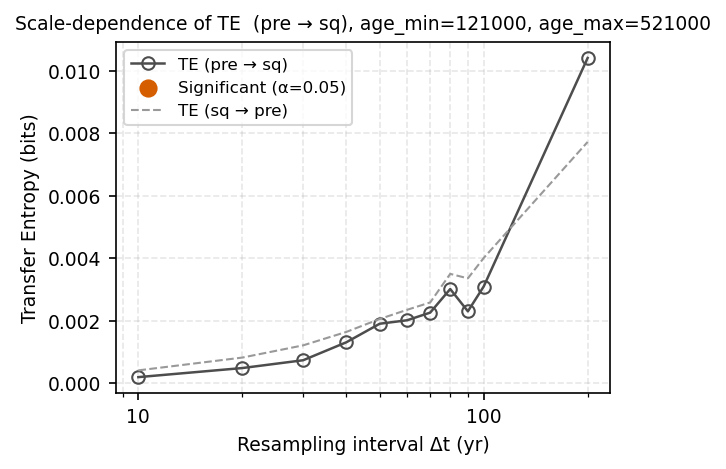

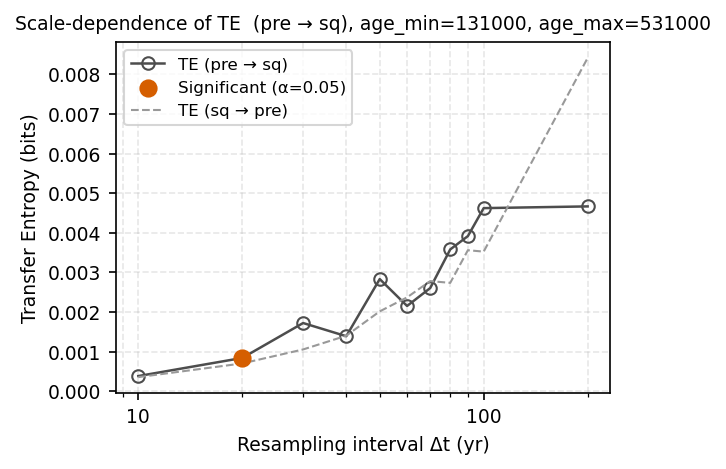

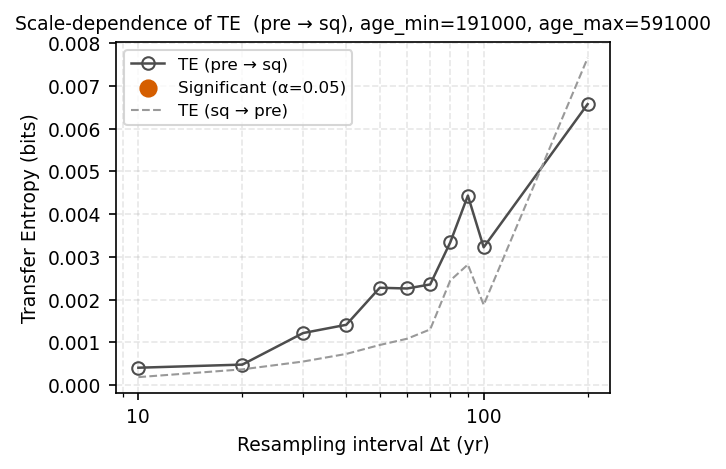

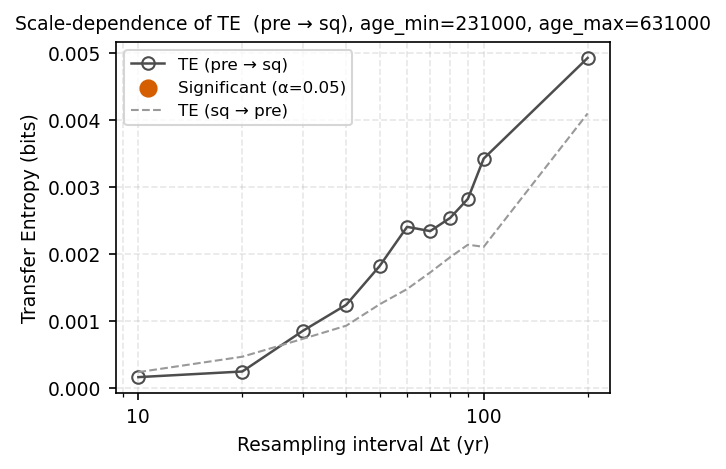

In [19]:
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)
import numpy as np

# parameters
window_size = 400_000     # size of sliding window in years
step = 10_000             # step size in years

df = df_filt_d18O.copy()
# overall age range
age_min = df['age'].min()
age_max = df['age'].max()

# prepare to collect results
all_results = []

# slide the window from age_min to age_max
for start in np.arange(age_min, age_max - window_size + 1, step):
    end = start + window_size
    # crop the dataframe for the current window
    df_crop = df[(df['age'] >= start) & (df['age'] <= end)]

    # skip if there is not enough data in this window
    if df_crop.empty:
        continue

    print(f"Running TE scan for window {int(start)} to {int(end)} years")

    # run the transfer entropy vs dt scan
dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]  # time steps in years
for start in np.arange(age_min, age_max - window_size + 1, step):
    end = start + window_size
    # print start and end of the window
    print(f"Processing window: {int(start)} to {int(end)} years")
    df_crop = df[(df['age'] >= start) & (df['age'] <= end)]
    if df_crop.empty:
        continue

    te_df, (fig, ax) = sa.te_vs_dt_scan(
        df_crop,
        dt_steps,
        forcing_bins=6,
        sq_bins=2,
        k=2,
        n_surr=100,
        alpha=0.05,
        sq_method='hist',
        dpi=150
    )

    # annotate results with window boundaries
    te_df['window_start'] = start
    te_df['window_end'] = end

    # collect
    all_results.append(te_df)

# combine all window results into one DataFrame
import pandas as pd
results_df = pd.concat(all_results, ignore_index=True)

# inspect
print(results_df)


# TE dT plot

     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000408  0.001  0.000215  0.119     True
1    20  0.000855  0.000  0.000490  0.043    False
2    30  0.001159  0.000  0.000743  0.050     True
3    40  0.001810  0.000  0.000956  0.057     True
4    50  0.002109  0.000  0.000884  0.256     True
5    60  0.002104  0.004  0.000927  0.392     True
6    70  0.002709  0.000  0.001368  0.167     True
7    80  0.003092  0.000  0.001212  0.341     True
8    90  0.001134  0.694  0.001936  0.098    False
9   100  0.003077  0.014  0.001816  0.183     True
10  200  0.003020  0.477  0.004372  0.098    False


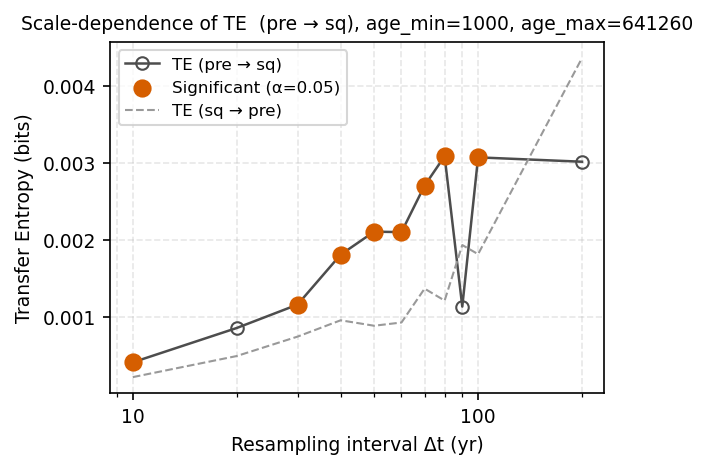

In [2]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing='pre',
    forcing_bins=6, sq_bins=2,
    k=1,                          # embedding dimension
    n_surr=1000, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000600  0.000  0.000104  0.768     True
1    20  0.001235  0.000  0.000194  0.804     True
2    30  0.001834  0.000  0.000191  0.964     True
3    40  0.002273  0.000  0.000412  0.790     True
4    50  0.003409  0.000  0.000532  0.761     True
5    60  0.002903  0.000  0.000442  0.915     True
6    70  0.003747  0.000  0.000750  0.739     True
7    80  0.003682  0.000  0.001101  0.493     True
8    90  0.002421  0.038  0.000730  0.826     True
9   100  0.003532  0.002  0.001642  0.299     True
10  200  0.003668  0.289  0.003713  0.172    False


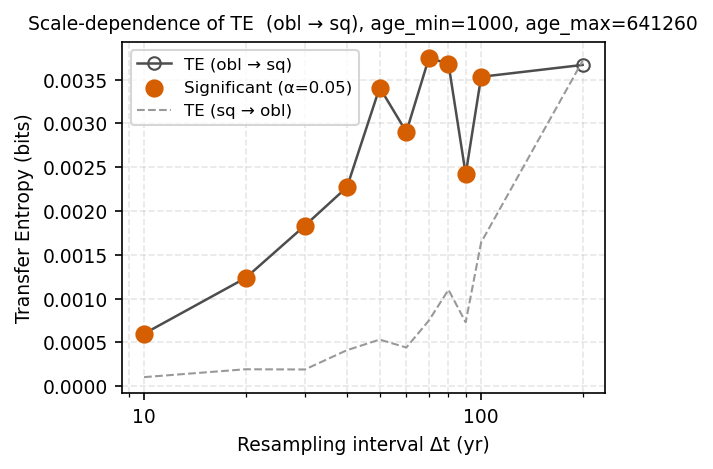

In [3]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=6, sq_bins=2,
    n_surr=1000, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)
 

# TE from pre and obl to CH4 MCV (dt=10)

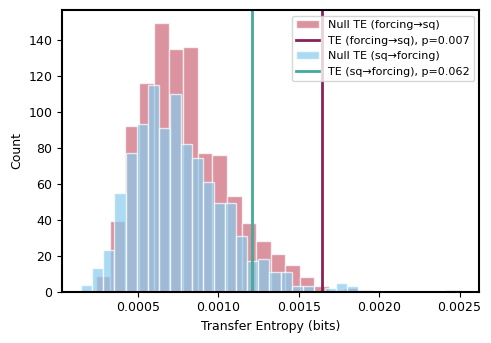

True


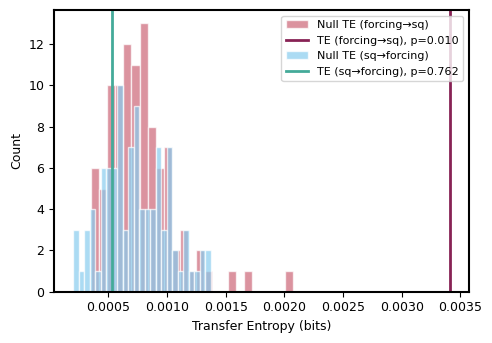

True


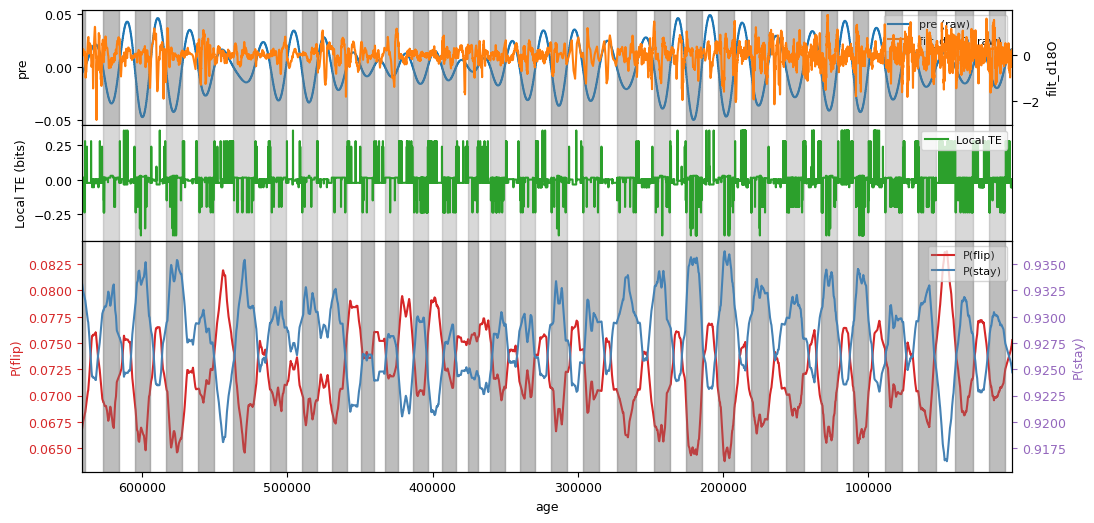

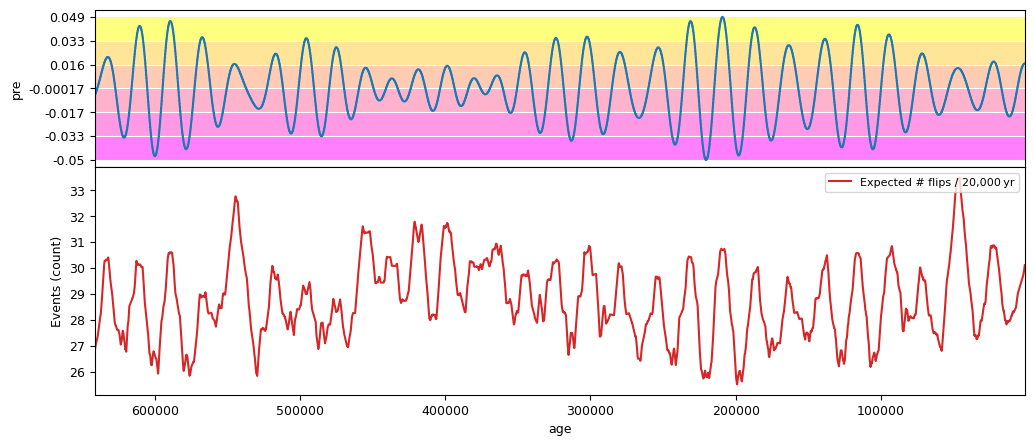

[26.78233782 26.80463904 26.82694026 ... 30.06740394 30.08970516
 30.11200638]


In [4]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt=50


# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy()[(df_filt_d18O['age'] > 71000) & (df_filt_d18O['age'] <= 191000)], dt, if_plot=False)

df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), dt, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig, te_pre=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=1000,sq_method='quantile')

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig, te_obl=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)


flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

flip_events =sa. flip_events(df_pre_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='pre',
        time_column='age',
        nbins_pre=6)

print(flip_events)


# LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)




# LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)



# Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)




# Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)


Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

# Where the TE comes from

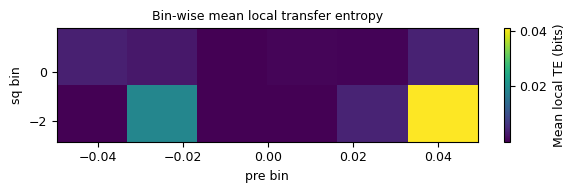

In [27]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

In [6]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    sampling_period = dt,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 18_000,
    src_max_period = 24_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 2*dt,
    trg_max_period = 3_000,
    n_trg_scales   = 64,
    k = 1,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='δ¹⁸O MCV'        # e.g. 'sq'
)

[ 2.          2.11094231  2.22803872  2.3516306   2.48207827  2.61976202
  2.76508324  2.91846561  3.08035627  3.25122719  3.43157651  3.62193003
  3.82284267  4.03490017  4.25872075  4.49495691  4.74429736  5.00746902
  5.28523911  5.57841743  5.88785869  6.21446501  6.55918857  6.92303433
  7.30706305  7.71239428  8.1402097   8.59175654  9.0683512   9.57138312
 10.1023188  10.66270609 11.25417872 11.87846102 12.53737297 13.23283554
 13.96687621 14.74163497 15.5593705  16.42246676 17.33343996 18.2949459
 19.30978769 20.38092393 21.51147732 22.70474383 23.9642022  25.29352418
 26.69658519 28.17747562 29.74051275 31.39025335 33.13150697 34.96934994
 36.90914019 38.95653284 41.11749673 43.39833178 45.80568738 48.34658179
 51.02842254 53.85902809 56.84665061 60.        ]
max-power row = 55   →  period ≈ 23.1 ka


In [7]:

wavelet          = 'cmor1.5-1.0'
sampling_period  = 30            # yr per sample (→ 0.05 ka on the x-axis)

# --- source (forcing) band: 18–24 ka  -------------------------------
src_min_period   = 18_000        # yr
src_max_period   = 24_000
n_src_scales     = 64

# --- target (response) band: 0.01–3 ka  ----------------------------
trg_min_period   = 10            # yr
trg_max_period   = 3_000
n_trg_scales     = 64

# ---------------------------------------------------------------------
# 2. data  – IMPORTANT: the function reverses time, so we do the same
# ---------------------------------------------------------------------
x = pre[::-1].copy()             # forcing, oldest sample first
y = sq[::-1].copy()              # response

# ---------------------------------------------------------------------
# 3. helper to turn periods → scales  (identical to the function code)
# ---------------------------------------------------------------------
import numpy as np, pywt, matplotlib.pyplot as plt

fc = pywt.central_frequency(wavelet)          # wavelet’s centre freq

def build_scales(min_p, max_p, n_sc):
    if np.isclose(min_p, max_p):              # “single” band → 3-ish neighbours
        ctr      = min_p
        periods  = ctr * np.geomspace(0.8, 1.2, n_sc)
    else:                                     # log-space band
        periods  = np.geomspace(min_p, max_p, n_sc)
    scales = periods * fc / sampling_period   # ➜ pywt scale formula
    return periods, scales

periods_x, scales_x = build_scales(src_min_period, src_max_period, n_src_scales)
periods_y, scales_y = build_scales(trg_min_period, trg_max_period, n_trg_scales)

# ---------------------------------------------------------------------
# 4. continuous wavelet transforms
# ---------------------------------------------------------------------
coeffs_x, _ = pywt.cwt(x, scales_x, wavelet, sampling_period=sampling_period)
coeffs_y, _ = pywt.cwt(y, scales_y, wavelet, sampling_period=sampling_period)

phase_x = np.angle(coeffs_x)       # shape (n_src_scales, N)
phase_y = np.angle(coeffs_y)       # shape (n_trg_scales, N)

# ---------------------------------------------------------------------
# 5. quick diagnostic: which source period carries the most power?
#    (duplicates the print-statement in the original)
# ---------------------------------------------------------------------
row_max = (np.abs(coeffs_x)**2).mean(axis=1).argmax()
print(f"max-power row = {row_max}   →  period ≈ {periods_x[row_max]/1000:.2f} ka")

# ---------------------------------------------------------------------
# 6. plot phase (“angle scalogram”) for x and y
# ---------------------------------------------------------------------
t_ka = np.arange(x.size) * sampling_period / 1000    # time axis in kyr BP

extent_src = [t_ka[0], t_ka[-1], periods_x[0]/1000, periods_x[-1]/1000]
extent_trg = [t_ka[0], t_ka[-1], periods_y[0]/1000, periods_y[-1]/1000]

fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios':[1,1]})

im0 = ax[0].imshow(phase_x, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_src)
ax[0].set_title('Phase of coeffs_x (source)')
ax[0].set_xlabel('time (ka BP)')
ax[0].set_ylabel('period (ka)')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

im1 = ax[1].imshow(phase_y, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_trg)
ax[1].set_title('Phase of coeffs_y (target)')
ax[1].set_xlabel('time (ka BP)')
plt.colorbar(im1, ax=ax[1], fraction=0.046)

plt.tight_layout()
plt.show()


max-power row = 54   →  period ≈ 23.03 ka


In [36]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# te_mat, p_src, p_trg = sa.freq_resolved_te(
#     x = obl,             # forcing   (chronological order!)
#     y = sq,              # response
#     sampling_period = 100,     # yr/pt
#     # source band: narrow around 20 ka
#     src_min_period = 35_000,
#     src_max_period = 50_000,
#     n_src_scales   = 64,
#     # target band: 0.1–3 ka
#     trg_min_period = 10,
#     trg_max_period = 3_000,
#     n_trg_scales   = 64,
#     k = 1,
#     plot = True,
#     source_vname='Obliquity',       # e.g. 'pre'
#     target_vname='δ¹⁸O MCV'        # e.g. 'sq'
# )

# P stay P flip analysis

In [38]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_d18O',
        nbins_pre=6,
        n_surr=100,
        alpha=0.05,
        y_min=0.8,
        y_max=0.98,
        random_state=0   # reproducible
)


# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_d18O',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

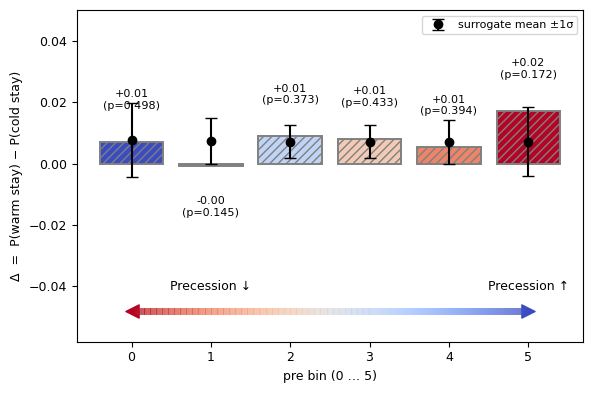

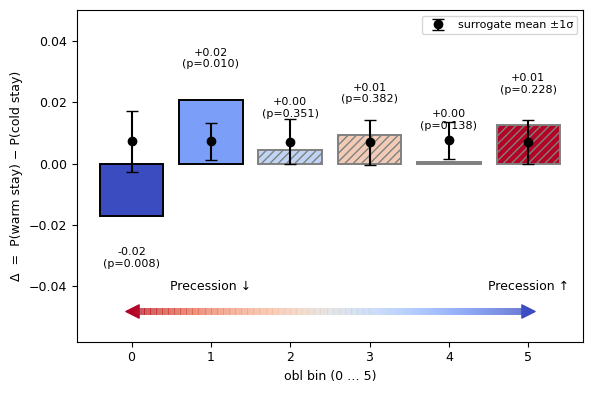

In [ ]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_d18O',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_obl_i,
    df_sq       = df_sq_i,
    forcing_column='obl',
    target_column='filt_d18O',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)

# The following are sensitivity tests

# Bin count

(21343,) (21343,) (21343,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    629   1842   2456   2703   1657    707
sq=1    789   1688   3135   3014   1867    856


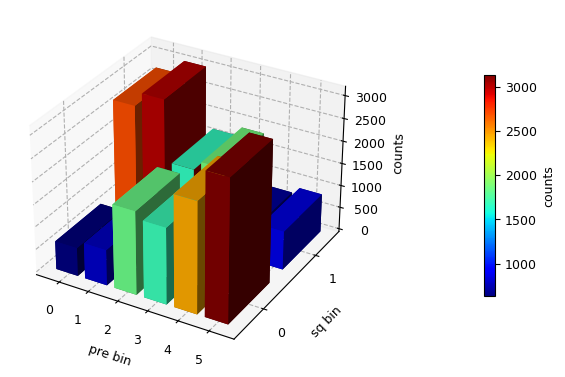

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0   1073   1864   1694   1513   2323   1527
sq=1    862   2677   1798   1836   2333   1843


In [12]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

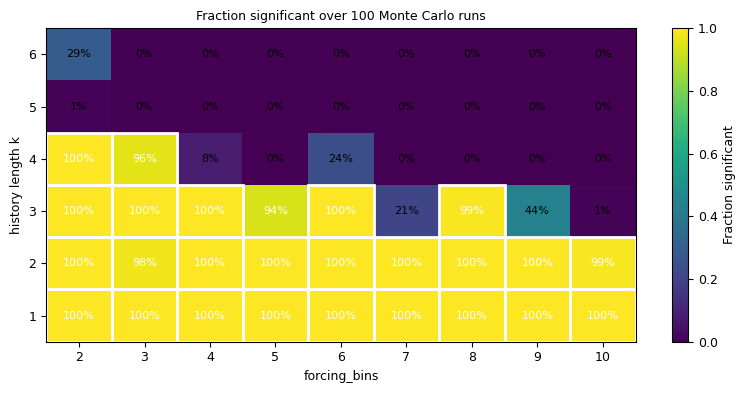

In [5]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 30, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_d18O'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

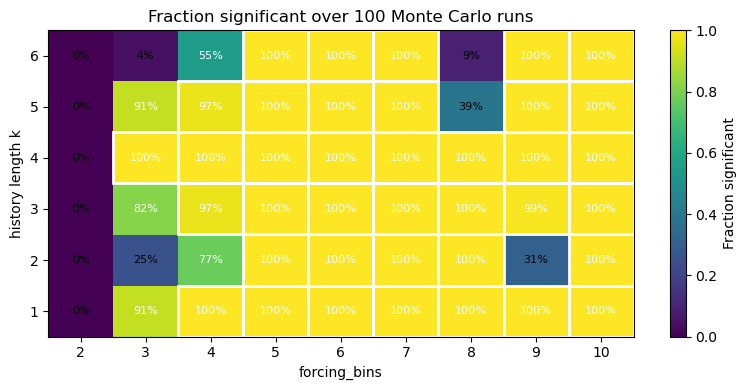

In [13]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 10, if_plot=False)

fractions= sa.mc_TE_heatmap(
    pre =df_obl_i['obl'].values,
    sq =df_sq_i['filt_d18O'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

# Influence of noise, test on different dt

In [14]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)

f=sa.mc_TE_heatmap_inter(
    df_filt_d18O,
    target_column='filt_d18O',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

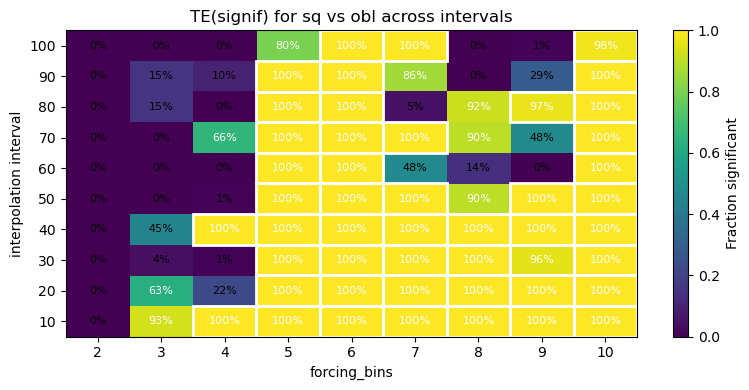

In [15]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)

f=sa.mc_TE_heatmap_inter(
    df_filt_d18O,
    target_column='filt_d18O',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='obl',
    plot=True
)

# Influence of age scale uncertainty: random scaling experiment

In [8]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 10000
max_age_ratio = max_age_error / np.max(df_filt_d18O['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_d18O.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 30, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_d18O'].values
    
    # test pre → sq
    result_pre, _ , _= sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ , _= sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 84 runs
  obl → sq was significant in 94 runs


# Influence of noise: random thining

In [15]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, False), (0.4, False), (0.6000000000000001, False), (0.8, False), (1.0, True)]
[(0.2, True), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]


# The influence of different bining plan ([max-min]/2; median; k-means)

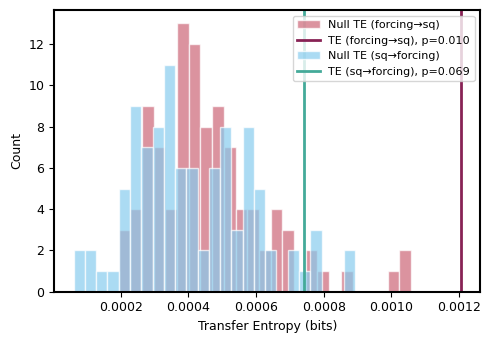

True


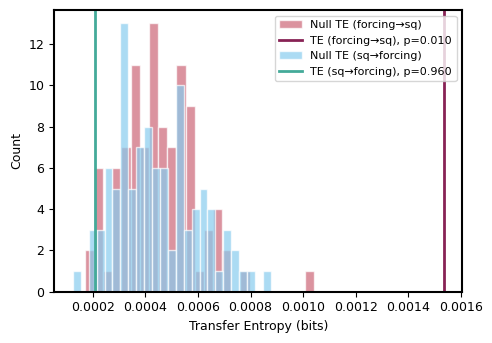

True


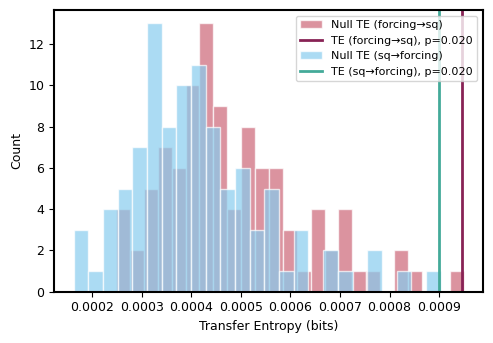

False


True


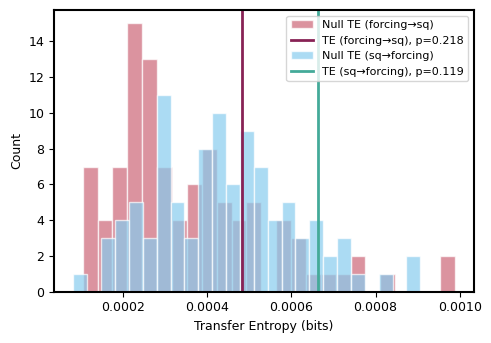

False


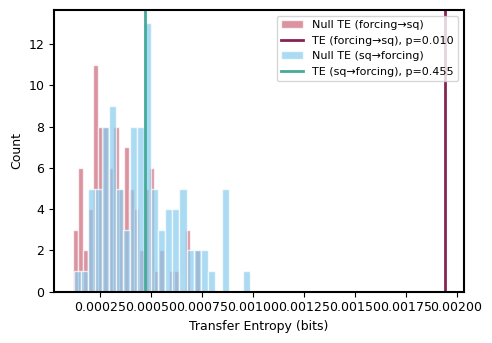

True


In [16]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

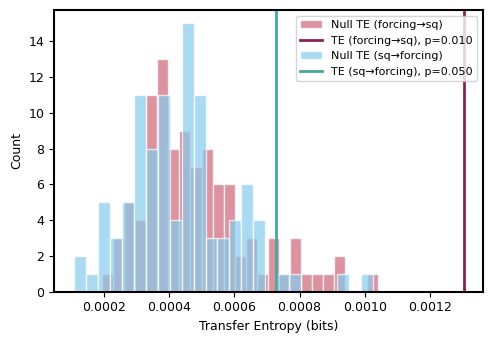

False


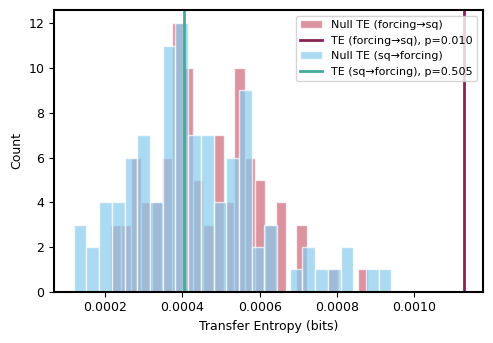

True


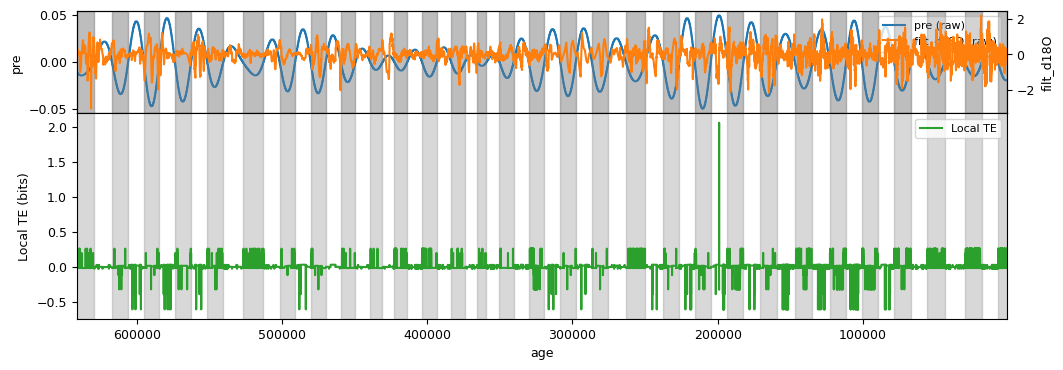

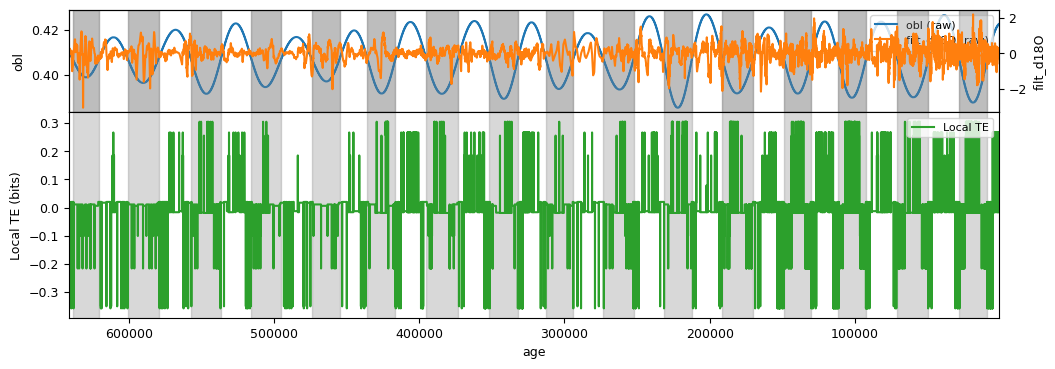

In [17]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_d18O.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The d18O bins

In [23]:
# plot the histogram of sq with bins=2
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of d18O Residuals with 2 Bins')
plt.xlabel('d18O Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()